In [ ]:
"""
회귀 - 단순 회귀, 다중 회귀로 분류
각각 선형, 비선형이 있다.
결정계수 - 얼마나 모델이 데이터를 잘 대변하고 있는가? (사회과학은 60% 이상, 자연과학 90%이상의 정확도를 요구)
F, P-value - F는 값이 클수록 좋고, P-value는 0.05나 0.01보다 작아야 안정된 모형이라고 판단한다.
F는 회귀모델의 신뢰성을 나타내는 수치, T는 회귀모델의 계수 신뢰성을 나타내는 수치
"""

기울기 :  [[0.63482159]]
절편 :  [0.12628453]
결정계수 :  0.1064571423759525


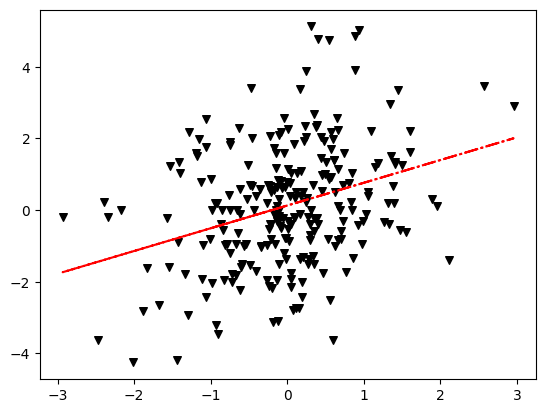

In [17]:
import pandas as pd
# ipython에서 지원해 주는, notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

#데이터를 읽어옴
h_stock = pd.read_csv('H_stock.csv') # H회사 주가
s_stock = pd.read_csv('S_stock.csv') # S회사 주가
k_index = pd.read_csv('K_index.csv') # 코스피 지수

#헤더정보를 제거함
h_rate = np.array(h_stock.h_rate[1:])
s_rate = np.array(s_stock.s_rate[1:])
k_rate = np.array(k_index.k_rate[1:])

#선형회귀모델함수에 넣기 위하여 reshape으로 차원조정[예:(248,) --> (248,1)] 1차 --> 2차
h_rate = h_rate.reshape(h_rate.shape[0],1) 
s_rate = s_rate.reshape(s_rate.shape[0],1) 
k_rate = k_rate.reshape(k_rate.shape[0],1) 

plt.scatter(k_rate, h_rate, c='black', s=30, marker='v',label='train')

model = linear_model.LinearRegression()
model.fit(k_rate, h_rate)

plt.plot(k_rate, model.predict(k_rate), linestyle='-.',label='h stock' , c='red')

print('기울기 : ' , model.coef_) # X데이터와 Y데이터가 서로 얼마나 영향을 주고 있는지 설명
print('절편 : ' , model.intercept_) 
print('결정계수 : ' , model.score(k_rate, h_rate)) # 회귀분석 모델을 평가하는 수치 --> 여기서는 10% 밖에 안됨


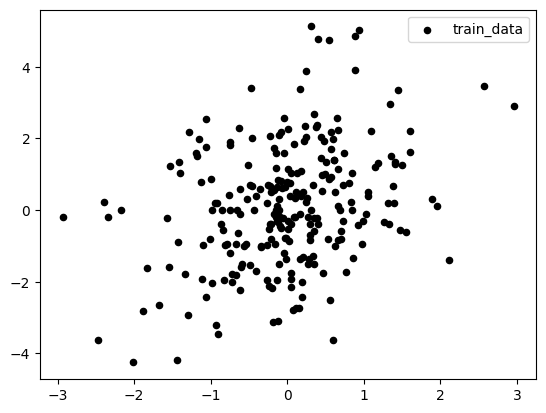

In [16]:
plt.scatter(k_rate, h_rate, c='black', s=20, marker='o',label='train_data')
plt.legend()

기울기 :  [[1.00132771]]
절편 :  [-0.03500143]
결정계수 :  0.2644483831226937


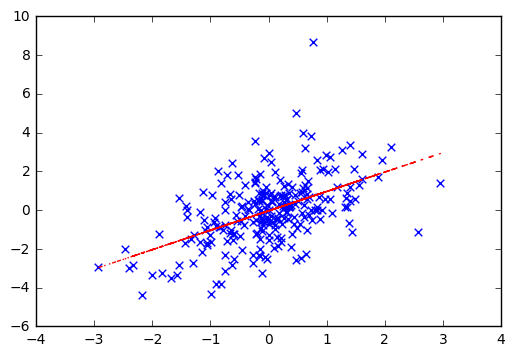

In [2]:
plt.scatter(k_rate, s_rate, c='blue', s=30, marker='x',label='s rate')

model = linear_model.LinearRegression()
model.fit(k_rate, s_rate)

plt.plot(k_rate, model.predict(k_rate), linestyle='-.',label='h stock' , c='red')

print('기울기 : ' , model.coef_) 
print('절편 : ' , model.intercept_) 
print('결정계수 : ' , model.score(k_rate, s_rate))


In [ ]:
# 코스피 지수가 증가함이 S회사에 미치는 영향력이 더 큼을 알 수 있다